# 4 EDA II: Multivariate Analysis

Reading the book [Humanities Data and R](http://humanitiesdata.org)

In [1]:
geodf = read.csv('data/ch03/geodf.csv', as.is=TRUE)
dim(geodf)

hhIncome = read.csv(
    'data/ch03/hhIncome.csv', 
    as.is=TRUE, check.names=FALSE,
)
hhIncome = as.matrix(hhIncome)
head(hhIncome)

meansOfCommute = read.csv('data/ch03/meansOfCommute.csv', as.is=TRUE)
meansOfCommute = as.matrix(meansOfCommute)
head(meansOfCommute)

[1] 826   6

total,0k,10k,15k,20k,25k,30k,35k,40k,45k,50k,60k,75k,100k,125k,150k,200k
1225,113,60,42,87,50,27,48,90,77,86,183,94,132,86,24,26
1322,119,162,93,81,91,15,27,72,43,139,113,160,56,106,22,23
1162,107,69,107,116,60,127,44,88,92,129,86,94,4,8,5,26
1397,168,188,89,98,84,89,51,58,83,107,146,140,34,24,24,14
1117,70,131,93,73,66,60,76,89,112,107,90,93,29,3,0,25
897,75,81,70,69,67,56,47,71,72,47,99,53,46,27,6,11


total,car,public_trans,bus,subway,railroad,ferry,bike,walk,taxi,work_at_home
1242,984,0,0,0,0,0,8,62,40,148
1199,1036,0,0,0,0,0,34,38,14,77
999,849,0,0,0,0,0,21,16,0,113
1035,954,0,0,0,0,0,4,43,0,34
1123,938,0,0,0,0,0,40,55,21,69
719,572,10,10,0,0,0,4,44,9,80


## 4.2 Scatter plots

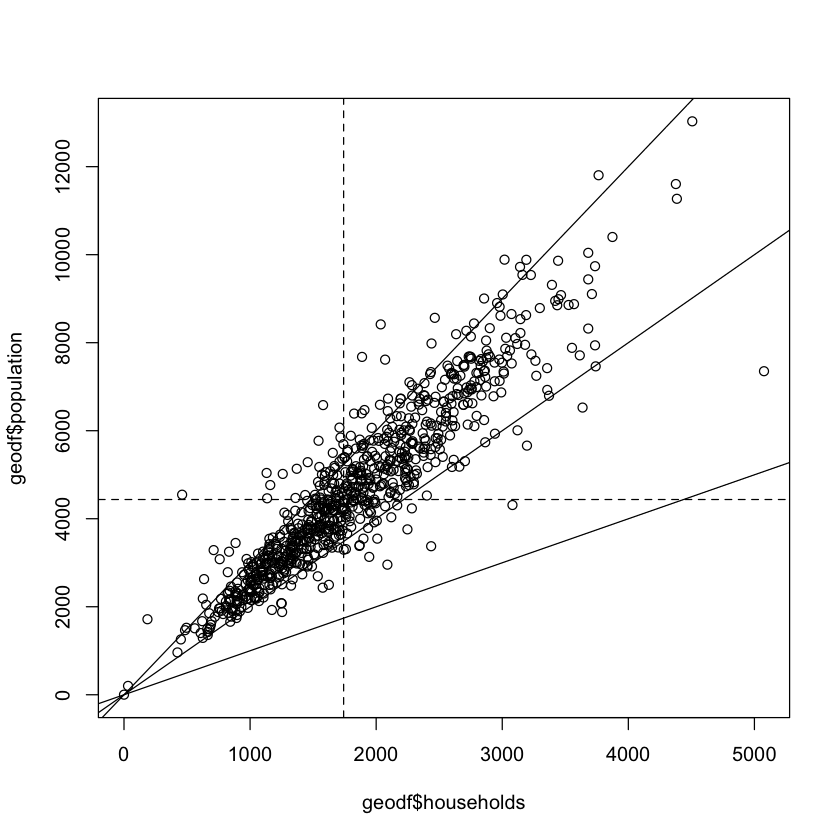

In [2]:
plot(geodf$households, geodf$population)
abline(0,1)
abline(0,2)
abline(0,3)
abline(v=quantile(geodf$households, prob=0.5), lty='dashed')
abline(h=quantile(geodf$population, prob=0.5), lty='dashed')

In [3]:
portland = which(geodf$csa == 'Portland')

In [4]:
cexVals = rep(0.5, nrow(geodf))
cexVals[portland] = 1

In [5]:
pchVals = rep(19, nrow(geodf))
pchVals[portland] = 3

In [6]:
colVals = rep(grey(0.2), nrow(geodf))
colVals[portland] = grey(0.8)

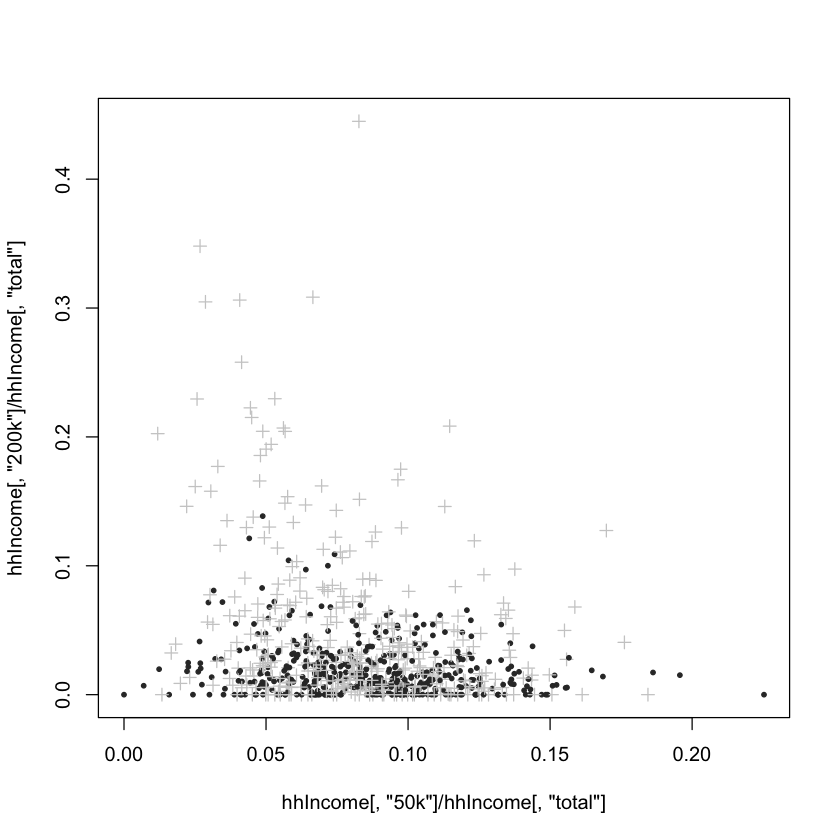

In [7]:
plot(
    hhIncome[,"50k"]/hhIncome[,"total"],
    hhIncome[,"200k"]/hhIncome[,"total"],
    cex=cexVals,
    pch=pchVals,
    col=colVals,
)

In [8]:
?pch

points {graphics},R Documentation
"x, y",coordinate vectors of points to plot.
type,character indicating the type of plotting; actually any of the types as in plot.default.
...,Further graphical parameters may also be supplied as arguments. See ‘Details’.


## 4.3 Text

In [9]:
county30k = tapply(hhIncome[,"30k"], geodf$county, sum)
county200k = tapply(hhIncome[,"200k"], geodf$county, sum)
countyTotal = tapply(hhIncome[,"total"], geodf$county, sum)
county30k = county30k/countyTotal
county200k = county200k/countyTotal

In [10]:
county30k

Baker     Benton  Clackamas    Clatsop   Columbia       Coos      Crook 
0.05252809 0.04556075 0.04565711 0.06273414 0.05217893 0.06961491 0.07882883 
     Curry  Deschutes    Douglas    Gilliam      Grant     Harney Hood River 
0.02539836 0.05758270 0.06935638 0.03397508 0.08165110 0.05107613 0.05415029 
   Jackson  Jefferson  Josephine    Klamath       Lake       Lane    Lincoln 
0.05906904 0.06787617 0.06400116 0.05902549 0.04430735 0.05860798 0.05164252 
      Linn    Malheur     Marion     Morrow  Multnomah       Polk    Sherman 
0.04722508 0.05860300 0.06302688 0.06201550 0.04984327 0.05141825 0.03748489 
 Tillamook   Umatilla      Union    Wallowa      Wasco Washington    Wheeler 
0.05734662 0.06034999 0.05627748 0.05240320 0.07012068 0.04522454 0.09760000 
   Yamhill 
0.06251098

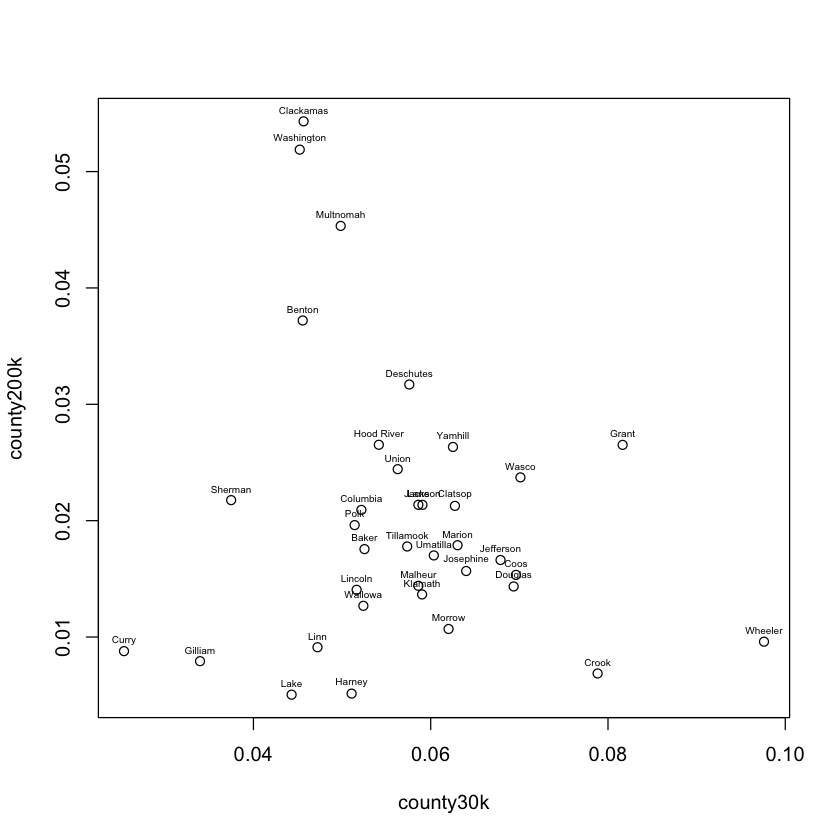

In [11]:
plot(county30k, county200k)
text(county30k, county200k+0.001, labels=names(county30k), cex=0.5)

In [12]:
names(county30k)

[1] "Baker"      "Benton"     "Clackamas"  "Clatsop"    "Columbia"  
 [6] "Coos"       "Crook"      "Curry"      "Deschutes"  "Douglas"   
[11] "Gilliam"    "Grant"      "Harney"     "Hood River" "Jackson"   
[16] "Jefferson"  "Josephine"  "Klamath"    "Lake"       "Lane"      
[21] "Lincoln"    "Linn"       "Malheur"    "Marion"     "Morrow"    
[26] "Multnomah"  "Polk"       "Sherman"    "Tillamook"  "Umatilla"  
[31] "Union"      "Wallowa"    "Wasco"      "Washington" "Wheeler"   
[36] "Yamhill"

In [13]:
geodf$csa[20:30]

[1] "None"     "None"     "None"     "None"     "None"     "Portland"
 [7] "Portland" "Portland" "Portland" "Portland" "Portland"

In [14]:
geodf$csa[match(names(county30k), geodf$county)]

[1] "None"     "None"     "Portland" "None"     "Portland" "None"    
 [7] "Bend"     "None"     "Bend"     "None"     "None"     "None"    
[13] "None"     "None"     "Medford"  "None"     "Medford"  "None"    
[19] "None"     "None"     "None"     "None"     "None"     "None"    
[25] "None"     "Portland" "None"     "None"     "None"     "None"    
[31] "None"     "None"     "None"     "Portland" "None"     "Portland"

In [15]:
csaValues = geodf$csa[match(names(county30k), geodf$county)]

In [16]:
csaSet = unique(geodf$csa)
index = match(csaValues, csaSet)
index

[1] 1 1 2 1 2 1 3 1 3 1 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2

In [17]:
colVals = c('orchid1', 'navy', 'wheat3', 'olivedrab')
colVals[index]

[1] "orchid1"   "orchid1"   "navy"      "orchid1"   "navy"      "orchid1"  
 [7] "wheat3"    "orchid1"   "wheat3"    "orchid1"   "orchid1"   "orchid1"  
[13] "orchid1"   "orchid1"   "olivedrab" "orchid1"   "olivedrab" "orchid1"  
[19] "orchid1"   "orchid1"   "orchid1"   "orchid1"   "orchid1"   "orchid1"  
[25] "orchid1"   "navy"      "orchid1"   "orchid1"   "orchid1"   "orchid1"  
[31] "orchid1"   "orchid1"   "orchid1"   "navy"      "orchid1"   "navy"

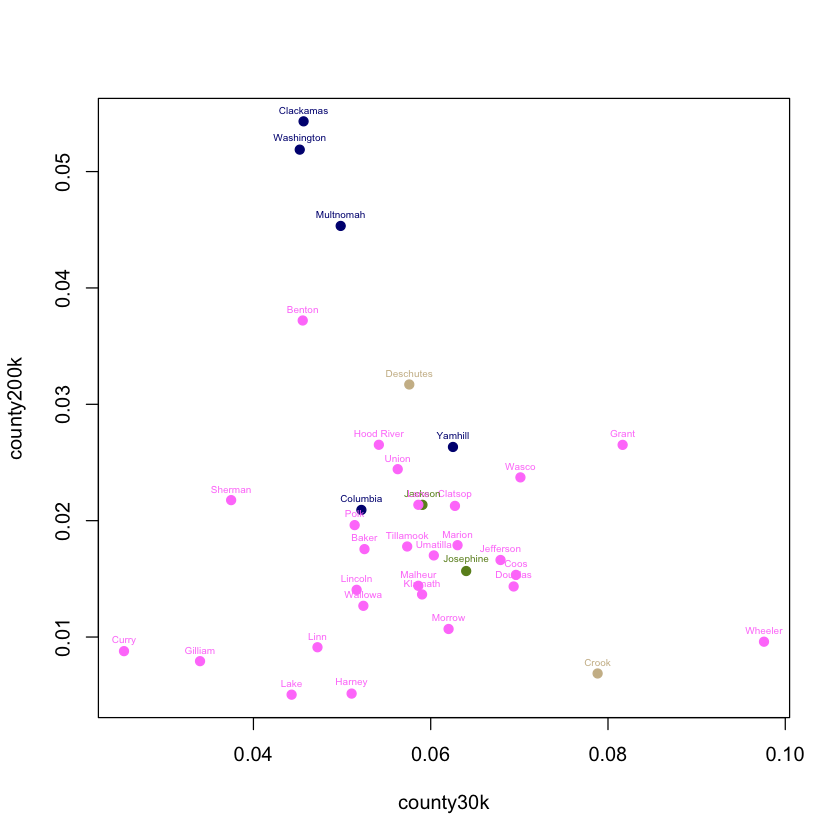

In [18]:
plot(county30k, county200k, col=colVals[index], pch=19)
text(county30k, county200k+0.001, labels=names(county30k), 
     col=colVals[index], cex=0.5)

In [19]:
data.frame(csaSet, colVals)

,csaSet,colVals
1,None,orchid1
2,Portland,navy
3,Bend,wheat3
4,Medford,olivedrab


## 4.4 Points

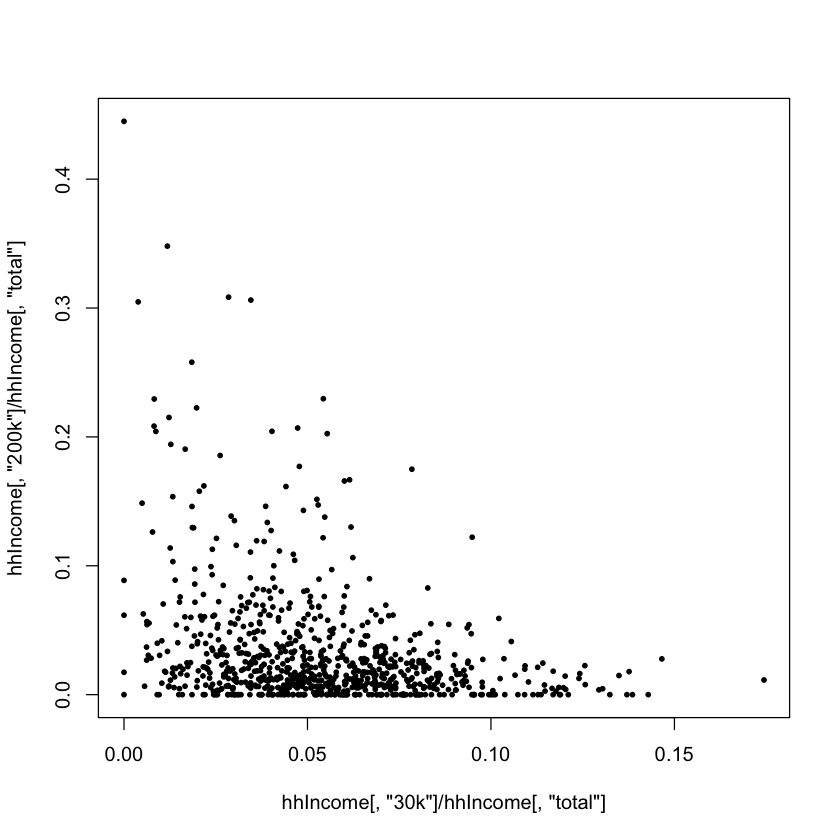

In [20]:
plot(
    hhIncome[, '30k'] / hhIncome[, 'total'],
    hhIncome[, '200k'] / hhIncome[, 'total'],
    col='black',
    pch=19,
    cex=0.5,
)

In [21]:
walkPerc = meansOfCommute[, "walk"]/meansOfCommute[,"total"]
walkPerc = round(walkPerc * 100)
head(walkPerc)
index = which(walkPerc > 30)
length(index)

[1] 5 3 2 4 5 6

[1] 10

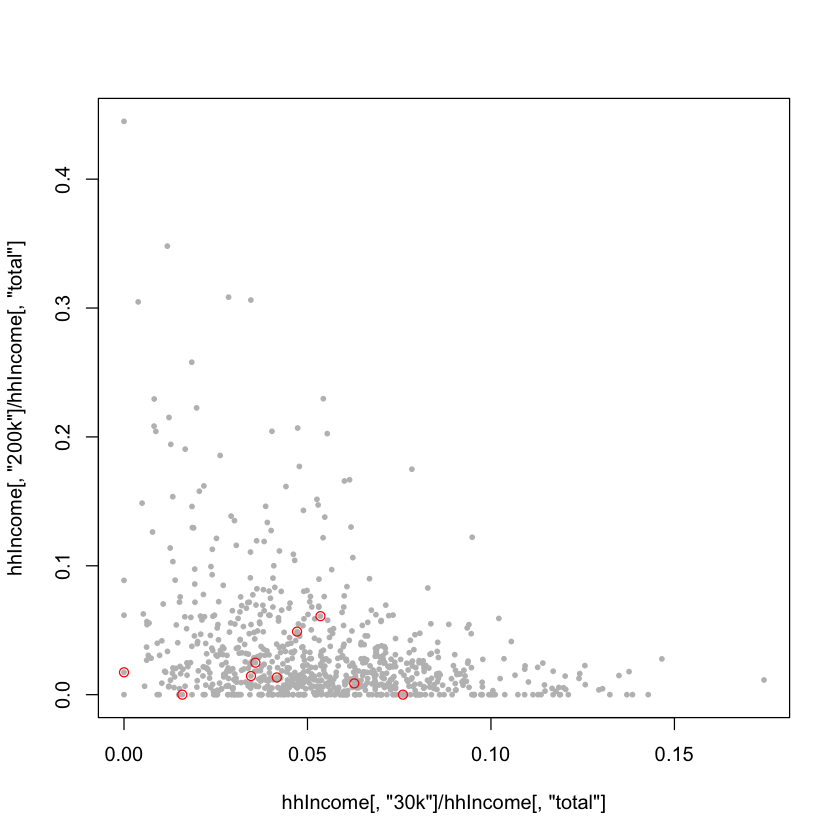

In [22]:
plot(
    hhIncome[, '30k'] / hhIncome[, 'total'],
    hhIncome[, '200k'] / hhIncome[, 'total'],
    col='grey',
    pch=19,
    cex=0.5,
)
points(
    hhIncome[index, '30k'] / hhIncome[index, 'total'],
    hhIncome[index, '200k'] / hhIncome[index, 'total'],
    col='red',
)

## 4.5 Line plots

In [23]:
timeOfCommute = read.csv(
    'data/ch04/timeOfCommute.csv',
    as.is=TRUE,
    check.names = FALSE,
)
timeOfCommute = as.matrix(timeOfCommute)
head(timeOfCommute)

total,5am,5:30am,6am,6:30am,7am,7:30am,8am,8:30am,9am,10am,11am,12pm,4pm,12am
1094,64,58,57,141,121,187,192,62,66,52,41,0,22,31
1122,37,79,47,93,159,128,296,77,32,35,36,21,81,1
886,24,44,98,58,49,131,141,130,32,45,0,11,25,98
1001,75,7,24,48,66,136,334,79,62,62,0,0,70,38
1054,32,5,17,99,36,105,186,170,73,18,106,9,72,126
639,34,26,16,54,125,134,19,90,12,69,3,10,28,19


In [24]:
timeOfCommute[, -1] = timeOfCommute[, -1] / timeOfCommute[, 1]
head(timeOfCommute)

total,5am,5:30am,6am,6:30am,7am,7:30am,8am,8:30am,9am,10am,11am,12pm,4pm,12am
1.094000e+03,5.850091e-02,5.301645e-02,5.210238e-02,1.288848e-01,1.106033e-01,1.709324e-01,1.755027e-01,5.667276e-02,6.032907e-02,4.753199e-02,3.747715e-02,0.000000e+00,2.010969e-02,2.833638e-02
1.122000e+03,3.297683e-02,7.040998e-02,4.188948e-02,8.288770e-02,1.417112e-01,1.140820e-01,2.638146e-01,6.862745e-02,2.852050e-02,3.119430e-02,3.208556e-02,1.871658e-02,7.219251e-02,8.912656e-04
886.00000000,0.02708804,0.04966140,0.11060948,0.06546275,0.05530474,0.14785553,0.15914221,0.14672686,0.03611738,0.05079007,0.00000000,0.01241535,0.02821670,0.11060948
1.001000e+03,7.492507e-02,6.993007e-03,2.397602e-02,4.795205e-02,6.593407e-02,1.358641e-01,3.336663e-01,7.892108e-02,6.193806e-02,6.193806e-02,0.000000e+00,0.000000e+00,6.993007e-02,3.796204e-02
1.054000e+03,3.036053e-02,4.743833e-03,1.612903e-02,9.392789e-02,3.415560e-02,9.962049e-02,1.764706e-01,1.612903e-01,6.925996e-02,1.707780e-02,1.005693e-01,8.538899e-03,6.831120e-02,1.195446e-01
6.390000e+02,5.320814e-02,4.068858e-02,2.503912e-02,8.450704e-02,1.956182e-01,2.097027e-01,2.973396e-02,1.408451e-01,1.877934e-02,1.079812e-01,4.694836e-03,1.564945e-02,4.381847e-02,2.973396e-02


In [25]:
numericTimes = c(5,5.5,6,6.5,7,7.5,8,8.5,9,10,11,12,16,24)

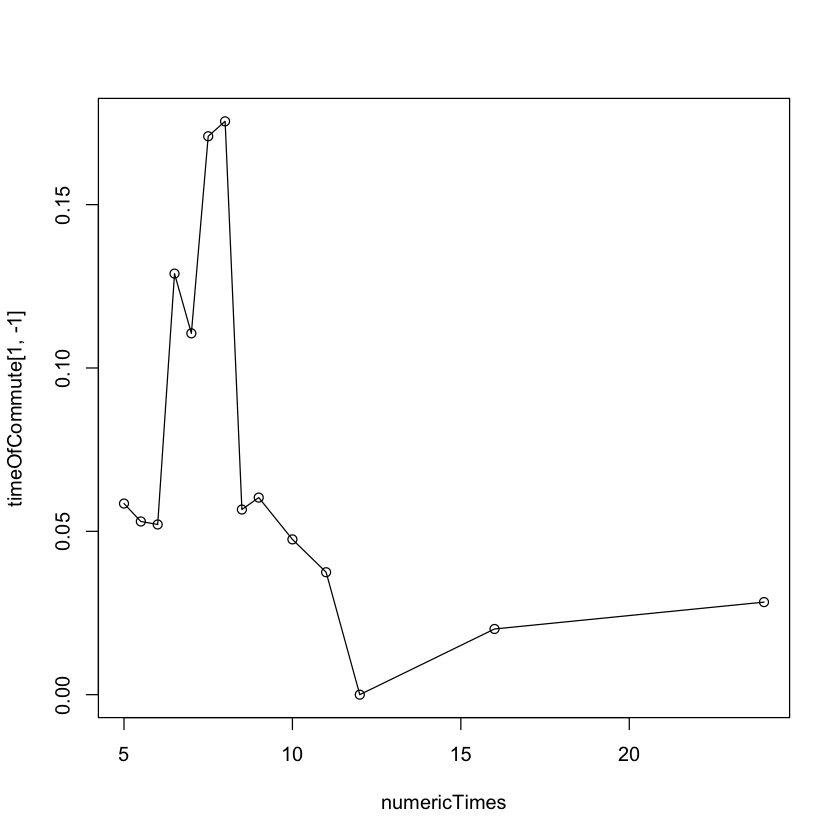

In [26]:
plot(numericTimes, timeOfCommute[1,-1])
lines(numericTimes, timeOfCommute[1,-1])

In [27]:
timeOfCommuteDens = timeOfCommute[,-1]
timeOfCommuteDens[,1] = timeOfCommuteDens[,1] / 5
timeOfCommuteDens[,2:9] = timeOfCommuteDens[,2:9] / 0.5
timeOfCommuteDens[,13] = timeOfCommuteDens[,13] / 4
timeOfCommuteDens[,14] = timeOfCommuteDens[,14] / 8

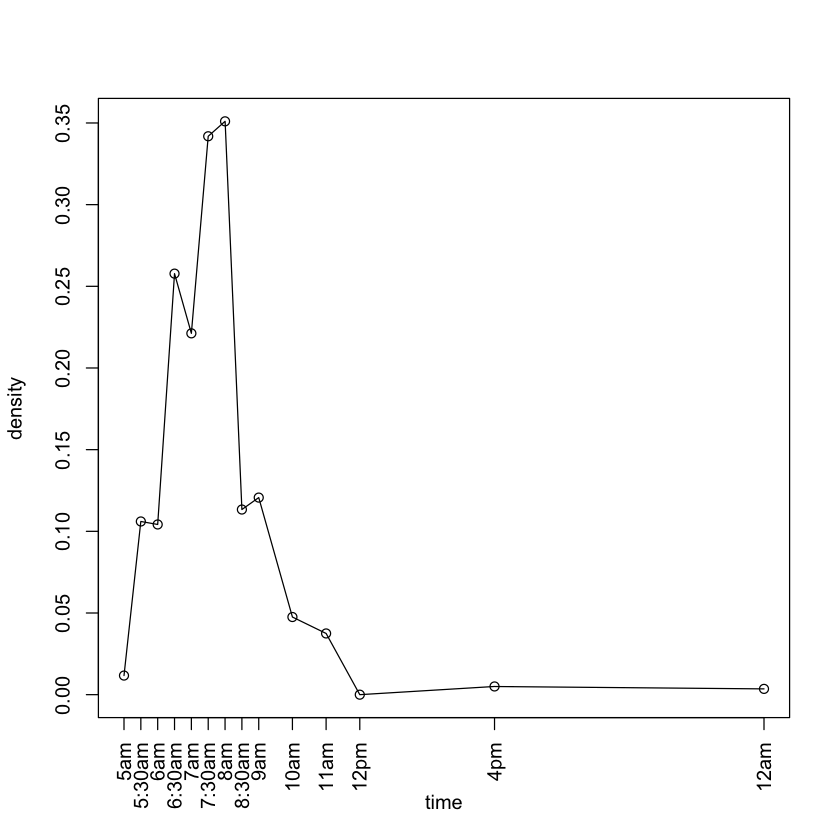

In [28]:
plot(numericTimes, timeOfCommuteDens[1,], axes=FALSE, 
     xlab='time', ylab='density')
lines(numericTimes, timeOfCommuteDens[1,])
box()
axis(2)
axis(1, at=numericTimes, label=colnames(timeOfCommuteDens), las=2)

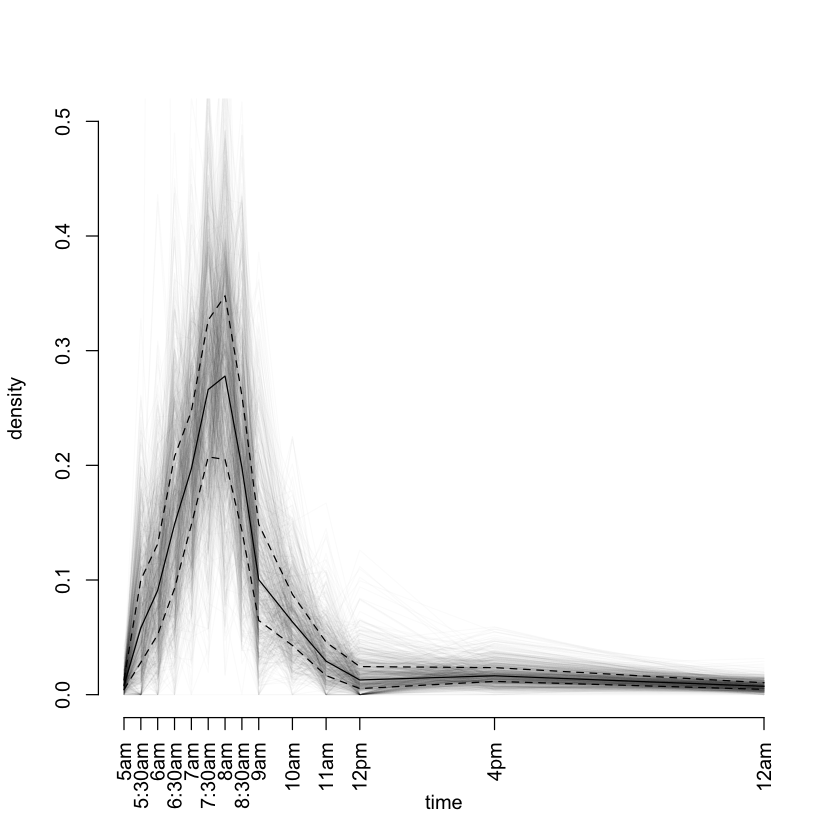

In [29]:
plot(
    numericTimes,
    timeOfCommuteDens[1,], 
    type='n',
    axes=FALSE, 
    xlab='time', ylab='density',
    ylim=c(0,0.5),
)
for (j in 1:nrow(timeOfCommuteDens)) {
    lines(
        numericTimes, timeOfCommuteDens[j,],
        col=grey(0, alpha=0.02),
    )    
}
axis(2)
axis(1, at=numericTimes, label=colnames(timeOfCommuteDens), las=2)
medianTimes = apply(timeOfCommuteDens, 2, quantile, probs=0.5)
lines(numericTimes, medianTimes)
q1Times = apply(timeOfCommuteDens, 2, quantile, probs=0.25)
lines(numericTimes, q1Times, lty='dashed')
q3Times = apply(timeOfCommuteDens, 2, quantile, probs=0.75)
lines(numericTimes, q3Times, lty='dashed')

## 4.6 Scatter Plot Matrix

In [31]:
carPerc = meansOfCommute[,"car"]/meansOfCommute[,"total"]
carPerc = round(carPerc * 100)
quantile(carPerc)

0%  25%  50%  75% 100% 
  22   78   85   89   98

In ``tractData`` below I called the third column ``commute7h`` and not ``inc30k`` because of the way the column is defined. Probably an error in the book.

In [34]:
tractData = data.frame(
    walkPerc,
    carPerc,
    commute7h = timeOfCommuteDens[,"7am"],
    inc200k = hhIncome[,"200k"]/hhIncome[,"total"]
)
dim(tractData)

[1] 826   4

In [40]:
tractData = tractData[apply(is.na(tractData), 1, sum) == 0, ]
dim(tractData)

[1] 825   4

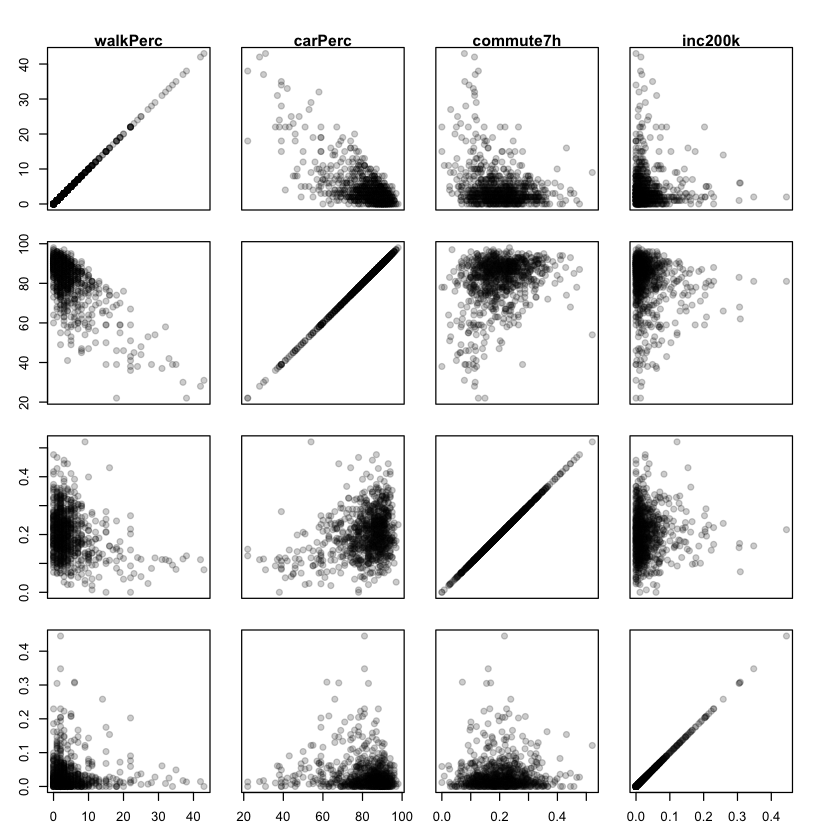

In [42]:
par(mfrow=c(4,4))
par(mar=c(1,1,1,1))
par(oma=c(2,2,2,2))
for (i in 1:ncol(tractData)) {
    for (j in 1:ncol(tractData)) {
        plot(
            tractData[,j], tractData[,i],
            pch=19,
            col=grey(0, 0.2),
            axes = FALSE,
        )
        box()
        if (i == 1) {
            title(main=colnames(tractData)[j])
        }
        if (i == ncol(tractData)) {
            axis(1)
        }
        if (j == 1) {
            axis(2)
        }
    }
}

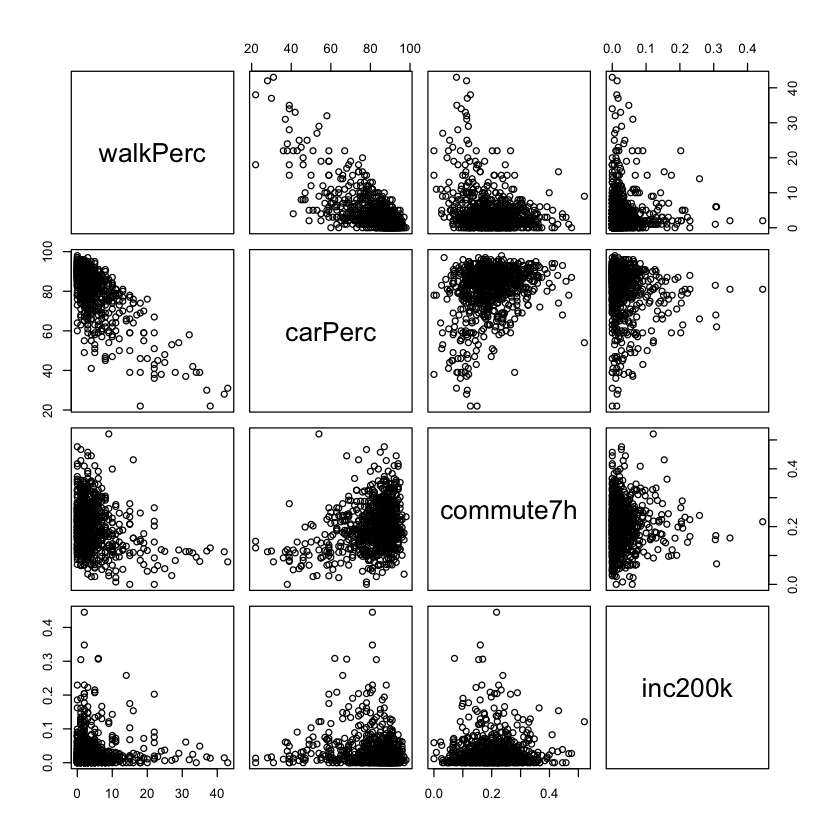

In [43]:
pairs(tractData)

## 4.7 Correlation Matrix

In [44]:
corMat = cor(tractData)
round(corMat, 2)

,walkPerc,carPerc,commute7h,inc200k
walkPerc,1.00,-0.71,-0.27,-0.03
carPerc,-0.71,1.00,0.30,-0.13
commute7h,-0.27,0.30,1.00,0.02
inc200k,-0.03,-0.13,0.02,1.00


In [72]:
help(plot)

plot {graphics},R Documentation
x,"the coordinates of points in the plot. Alternatively, a single plotting structure, function or any R object with a plot method can be provided."
y,"the y coordinates of points in the plot, optional if x is an appropriate structure."
...,"Arguments to be passed to methods, such as graphical parameters (see par). Many methods will accept the following arguments: typewhat type of plot should be drawn. Possible types are ""p"" for points, ""l"" for lines, ""b"" for both, ""c"" for the lines part alone of ""b"", ""o"" for both ‘overplotted’, ""h"" for ‘histogram’ like (or ‘high-density’) vertical lines, ""s"" for stair steps, ""S"" for other steps, see ‘Details’ below, ""n"" for no plotting. All other types give a warning or an error; using, e.g., type = ""punkte"" being equivalent to type = ""p"" for S compatibility. Note that some methods, e.g. plot.factor, do not accept this. mainan overall title for the plot: see title. suba sub title for the plot: see title. xlaba title for the x axis: see title. ylaba title for the y axis: see title. aspthe y/x aspect ratio, see plot.window."
